In [1]:
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler

# Load CSVs (features x samples format, so we need to transpose)
gene_df = pd.read_csv("../Updated_model_nd_dataset/processed_expression_FXS_OG.csv", index_col=0).T
meth_df = pd.read_csv("../Updated_model_nd_dataset/processed_methylation_FXS_OG.csv", index_col=0).T
cnv_df  = pd.read_csv("../Updated_model_nd_dataset/processed_cnv_FXS_OG.csv", index_col=0).T
scaler_meth = StandardScaler()
meth_df = pd.DataFrame(
    scaler_meth.fit_transform(meth_df.T).T,
    index=meth_df.index,
    columns=meth_df.columns
)
print("After transpose - Shapes (samples x features):")
print(f"gene_df: {gene_df.shape}")
print(f"meth_df: {meth_df.shape}")
print(f"cnv_df: {cnv_df.shape}")


After transpose - Shapes (samples x features):
gene_df: (205, 60660)
meth_df: (205, 396650)
cnv_df: (205, 56756)


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
print("NaN counts:", gene_df.isna().sum().sum(),
      meth_df.isna().sum().sum(),
      cnv_df.isna().sum().sum())


NaN counts: 0 0 0


In [4]:
gene_df = gene_df.fillna(0.0)
meth_df = meth_df.fillna(0.0)
cnv_df  = cnv_df.fillna(0.0)


In [5]:
print("Shapes:", gene_df.shape, meth_df.shape, cnv_df.shape)
# Align samples across all three omics
common = gene_df.index.intersection(meth_df.index).intersection(cnv_df.index)
gene_df = gene_df.loc[common]
meth_df = meth_df.loc[common]
cnv_df  = cnv_df.loc[common]

print("Shapes:", gene_df.shape, meth_df.shape, cnv_df.shape)
# Convert to float32 tensors
gene = torch.tensor(gene_df.values, dtype=torch.float32).to(device)
meth = torch.tensor(meth_df.values, dtype=torch.float32).to(device)
cnv  = torch.tensor(cnv_df.values, dtype=torch.float32).to(device)


Shapes: (205, 60660) (205, 396650) (205, 56756)
Shapes: (205, 60660) (205, 396650) (205, 56756)


Epoch 1/200 | Train Loss: 0.9405 | Val Loss: 1.7452
Epoch 2/200 | Train Loss: 2.3691 | Val Loss: 1.2658
Epoch 3/200 | Train Loss: 1.7182 | Val Loss: 1.3373
Epoch 4/200 | Train Loss: 1.6656 | Val Loss: 1.2997
Epoch 5/200 | Train Loss: 1.5954 | Val Loss: 1.2325
Epoch 6/200 | Train Loss: 1.4275 | Val Loss: 1.1935
Epoch 7/200 | Train Loss: 1.3289 | Val Loss: 1.1730
Epoch 8/200 | Train Loss: 1.2790 | Val Loss: 1.1589
Epoch 9/200 | Train Loss: 1.2409 | Val Loss: 1.1447
Epoch 10/200 | Train Loss: 1.2156 | Val Loss: 1.1248
Epoch 11/200 | Train Loss: 1.1649 | Val Loss: 1.1084
Epoch 12/200 | Train Loss: 1.1322 | Val Loss: 1.0963
Epoch 13/200 | Train Loss: 1.0957 | Val Loss: 1.0861
Epoch 14/200 | Train Loss: 1.0712 | Val Loss: 1.0717
Epoch 15/200 | Train Loss: 1.0449 | Val Loss: 1.0553
Epoch 16/200 | Train Loss: 1.0236 | Val Loss: 1.0384
Epoch 17/200 | Train Loss: 1.0135 | Val Loss: 1.0208
Epoch 18/200 | Train Loss: 0.9940 | Val Loss: 1.0041
Epoch 19/200 | Train Loss: 0.9857 | Val Loss: 0.9889
Ep

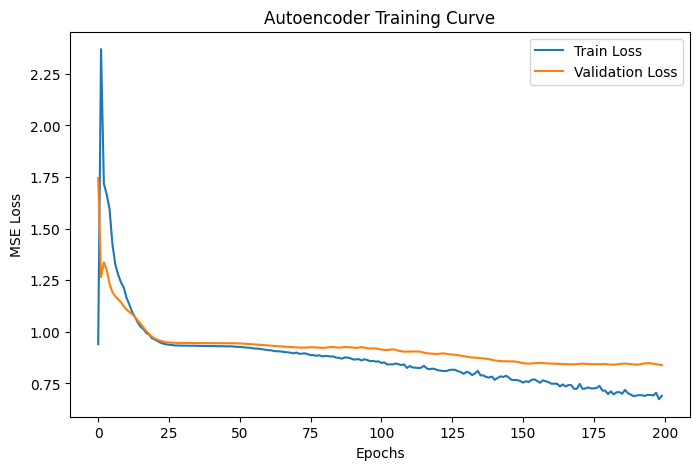

Epoch 1/200 | Train Loss: 1.0040 | Val Loss: 100.2001
Epoch 2/200 | Train Loss: 170.0379 | Val Loss: 20.7013
Epoch 3/200 | Train Loss: 47.4762 | Val Loss: 30.2058
Epoch 4/200 | Train Loss: 61.0020 | Val Loss: 29.1790
Epoch 5/200 | Train Loss: 63.7766 | Val Loss: 20.7661
Epoch 6/200 | Train Loss: 49.0319 | Val Loss: 14.3593
Epoch 7/200 | Train Loss: 38.8766 | Val Loss: 10.1814
Epoch 8/200 | Train Loss: 31.5395 | Val Loss: 8.0154
Epoch 9/200 | Train Loss: 24.4319 | Val Loss: 7.2669
Epoch 10/200 | Train Loss: 21.0484 | Val Loss: 6.9188
Epoch 11/200 | Train Loss: 19.7248 | Val Loss: 6.0016
Epoch 12/200 | Train Loss: 15.8671 | Val Loss: 5.0693
Epoch 13/200 | Train Loss: 13.6971 | Val Loss: 4.2716
Epoch 14/200 | Train Loss: 11.8222 | Val Loss: 3.7093
Epoch 15/200 | Train Loss: 9.8497 | Val Loss: 3.3243
Epoch 16/200 | Train Loss: 8.5426 | Val Loss: 2.9240
Epoch 17/200 | Train Loss: 7.3183 | Val Loss: 2.4729
Epoch 18/200 | Train Loss: 5.7942 | Val Loss: 2.1189
Epoch 19/200 | Train Loss: 5.1495

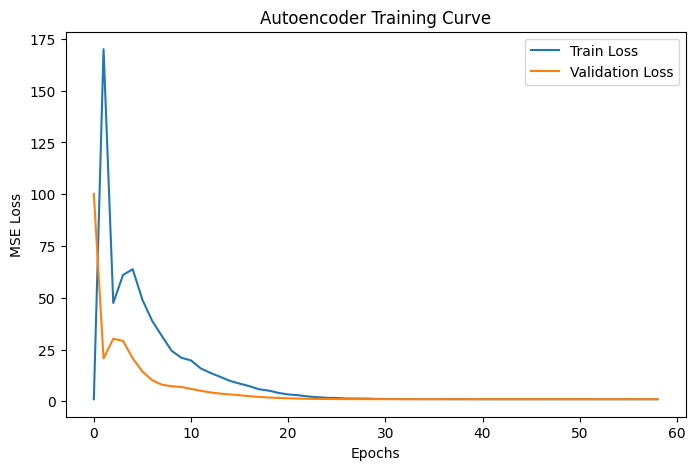

Epoch 1/200 | Train Loss: 1.0343 | Val Loss: 20.0073
Epoch 2/200 | Train Loss: 39.0445 | Val Loss: 5.0484
Epoch 3/200 | Train Loss: 10.6762 | Val Loss: 3.6391
Epoch 4/200 | Train Loss: 8.4566 | Val Loss: 4.0072
Epoch 5/200 | Train Loss: 11.3941 | Val Loss: 3.6120
Epoch 6/200 | Train Loss: 10.7554 | Val Loss: 2.6065
Epoch 7/200 | Train Loss: 9.0387 | Val Loss: 2.1175
Epoch 8/200 | Train Loss: 7.2124 | Val Loss: 1.7545
Epoch 9/200 | Train Loss: 6.2438 | Val Loss: 1.5724
Epoch 10/200 | Train Loss: 4.8841 | Val Loss: 1.5100
Epoch 11/200 | Train Loss: 4.5129 | Val Loss: 1.4466
Epoch 12/200 | Train Loss: 3.9370 | Val Loss: 1.3191
Epoch 13/200 | Train Loss: 3.4074 | Val Loss: 1.2438
Epoch 14/200 | Train Loss: 3.1446 | Val Loss: 1.1700
Epoch 15/200 | Train Loss: 2.7975 | Val Loss: 1.1209
Epoch 16/200 | Train Loss: 2.4849 | Val Loss: 1.0612
Epoch 17/200 | Train Loss: 2.2707 | Val Loss: 1.0007
Epoch 18/200 | Train Loss: 1.9572 | Val Loss: 0.9634
Epoch 19/200 | Train Loss: 1.8533 | Val Loss: 0.94

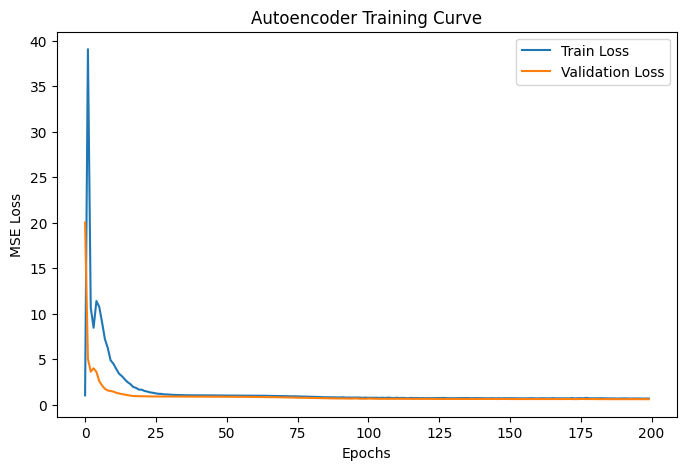

Fused latent shape: torch.Size([205, 192])


In [6]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

# ------------------ Autoencoder with Dropout ------------------
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim=64, dropout=0.3):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return z, x_recon

# ------------------ Training with validation & early stopping ------------------
def train_autoencoder(model, data, epochs=200, patience=20, normalize=True):
    # Optionally normalize features to mean=0, std=1
    if normalize:
        scaler = StandardScaler()
        data_np = scaler.fit_transform(data.cpu().numpy())
    else:
        data_np = data.cpu().numpy()

    # Split into train/val
    X_train, X_val = train_test_split(data_np, test_size=0.2, random_state=42)
    X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
    X_val   = torch.tensor(X_val, dtype=torch.float32).to(device)

    optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)  # L2 reg
    criterion = nn.MSELoss()

    train_losses, val_losses = [], []
    best_val_loss = np.inf
    best_model_state = None
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        z, recon = model(X_train)
        loss = criterion(recon, X_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            _, val_recon = model(X_val)
            val_loss = criterion(val_recon, X_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

        # Early stopping
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered!")
                break

    # Restore best model
    if best_model_state:
        model.load_state_dict(best_model_state)

    # Plot loss curves
    plt.figure(figsize=(8, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Autoencoder Training Curve")
    plt.legend()
    plt.show()

    return model

# ------------------ Train per omic ------------------
gene_dim, meth_dim, cnv_dim = gene.shape[1], meth.shape[1], cnv.shape[1]

ae_gene = Autoencoder(gene_dim, latent_dim=64).to(device)
ae_meth = Autoencoder(meth_dim, latent_dim=64).to(device)
ae_cnv  = Autoencoder(cnv_dim,  latent_dim=64).to(device)

ae_gene = train_autoencoder(ae_gene, gene, normalize=True)
ae_meth = train_autoencoder(ae_meth, meth, normalize=True)
ae_cnv  = train_autoencoder(ae_cnv, cnv, normalize=True)

# ------------------ Extract latents & fuse ------------------
ae_gene.eval(); ae_meth.eval(); ae_cnv.eval()
with torch.no_grad():
    z_gene, _ = ae_gene(gene.to(device))
    z_meth, _ = ae_meth(meth.to(device))
    z_cnv,  _ = ae_cnv(cnv.to(device))

z_fused = torch.cat([z_gene, z_meth, z_cnv], dim=1)
print("Fused latent shape:", z_fused.shape)


C:\Users\shini\AppData\Local\Temp\ipykernel_7532\3664053606.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(errs_train, label="Train", shade=True)
C:\Users\shini\AppData\Local\Temp\ipykernel_7532\3664053606.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(errs_val, label="Validation", shade=True)


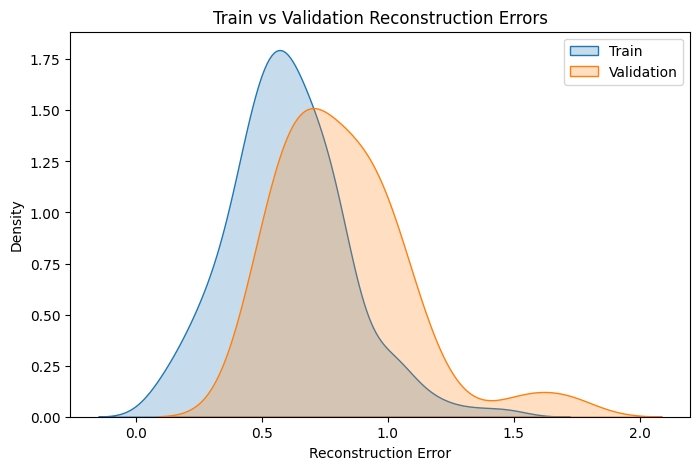

Median Train Err: 0.5878 | Median Val Err: 0.7649
Epoch 1/200 | Train Loss: 0.9411 | Val Loss: 1.7802
Epoch 2/200 | Train Loss: 2.5586 | Val Loss: 1.2501
Epoch 3/200 | Train Loss: 1.6761 | Val Loss: 1.2979
Epoch 4/200 | Train Loss: 1.6242 | Val Loss: 1.2359
Epoch 5/200 | Train Loss: 1.5374 | Val Loss: 1.1774
Epoch 6/200 | Train Loss: 1.4487 | Val Loss: 1.1281
Epoch 7/200 | Train Loss: 1.3362 | Val Loss: 1.1056
Epoch 8/200 | Train Loss: 1.2960 | Val Loss: 1.0876
Epoch 9/200 | Train Loss: 1.2514 | Val Loss: 1.0718
Epoch 10/200 | Train Loss: 1.2137 | Val Loss: 1.0556
Epoch 11/200 | Train Loss: 1.1720 | Val Loss: 1.0455
Epoch 12/200 | Train Loss: 1.1471 | Val Loss: 1.0363
Epoch 13/200 | Train Loss: 1.1097 | Val Loss: 1.0260
Epoch 14/200 | Train Loss: 1.0884 | Val Loss: 1.0162
Epoch 15/200 | Train Loss: 1.0577 | Val Loss: 1.0076
Epoch 16/200 | Train Loss: 1.0436 | Val Loss: 0.9979
Epoch 17/200 | Train Loss: 1.0234 | Val Loss: 0.9869
Epoch 18/200 | Train Loss: 1.0069 | Val Loss: 0.9770
Epoch

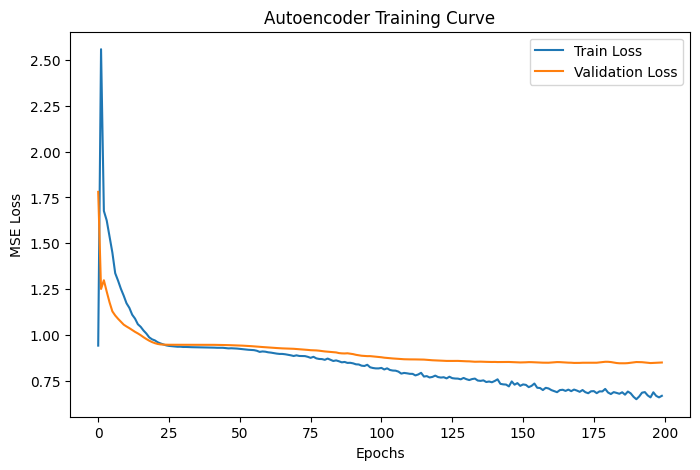

Epoch 1/200 | Train Loss: 0.9411 | Val Loss: 1.7691
Epoch 2/200 | Train Loss: 2.4407 | Val Loss: 1.2912
Epoch 3/200 | Train Loss: 1.7135 | Val Loss: 1.2926
Epoch 4/200 | Train Loss: 1.6259 | Val Loss: 1.2414
Epoch 5/200 | Train Loss: 1.5697 | Val Loss: 1.1956
Epoch 6/200 | Train Loss: 1.4363 | Val Loss: 1.1522
Epoch 7/200 | Train Loss: 1.3696 | Val Loss: 1.1151
Epoch 8/200 | Train Loss: 1.3384 | Val Loss: 1.0967
Epoch 9/200 | Train Loss: 1.2734 | Val Loss: 1.0863
Epoch 10/200 | Train Loss: 1.1895 | Val Loss: 1.0763
Epoch 11/200 | Train Loss: 1.1675 | Val Loss: 1.0646
Epoch 12/200 | Train Loss: 1.1211 | Val Loss: 1.0526
Epoch 13/200 | Train Loss: 1.0915 | Val Loss: 1.0379
Epoch 14/200 | Train Loss: 1.0612 | Val Loss: 1.0221
Epoch 15/200 | Train Loss: 1.0422 | Val Loss: 1.0081
Epoch 16/200 | Train Loss: 1.0205 | Val Loss: 0.9948
Epoch 17/200 | Train Loss: 0.9961 | Val Loss: 0.9824
Epoch 18/200 | Train Loss: 0.9841 | Val Loss: 0.9717
Epoch 19/200 | Train Loss: 0.9630 | Val Loss: 0.9636
Ep

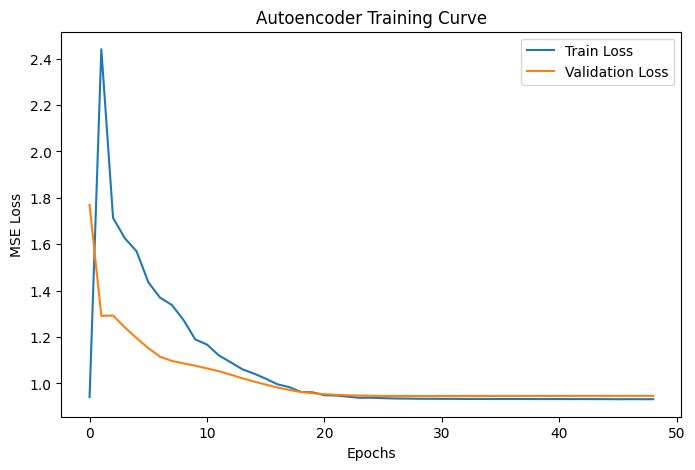

Latent stability (corr between runs): -0.036
Silhouette on fused latents: 0.2944992780685425


In [7]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# ------------------ Diagnostics ------------------
def reconstruction_error_distribution(model, X_train_np, X_val_np, device):
    """Compute and plot per-sample reconstruction errors for train/val."""
    def recon_errors(X_np):
        model.eval()
        with torch.no_grad():
            X_t = torch.tensor(X_np, dtype=torch.float32).to(device)
            _, recon = model(X_t)
        errs = ((recon.cpu().numpy() - X_np)**2).mean(axis=1)
        return errs

    errs_train = recon_errors(X_train_np)
    errs_val   = recon_errors(X_val_np)

    # KDE plots
    plt.figure(figsize=(8,5))
    sns.kdeplot(errs_train, label="Train", shade=True)
    sns.kdeplot(errs_val, label="Validation", shade=True)
    plt.xlabel("Reconstruction Error")
    plt.ylabel("Density")
    plt.title("Train vs Validation Reconstruction Errors")
    plt.legend()
    plt.show()

    print(f"Median Train Err: {np.median(errs_train):.4f} | Median Val Err: {np.median(errs_val):.4f}")

    return errs_train, errs_val

def latent_stability_check(model_class, data, latent_dim, device, n_runs=2):
    """Train AE multiple times and check correlation between latent spaces."""
    latents = []
    for seed in range(n_runs):
        torch.manual_seed(seed)
        np.random.seed(seed)
        model = model_class(data.shape[1], latent_dim=latent_dim).to(device)
        model = train_autoencoder(model, data, normalize=True)
        with torch.no_grad():
            z, _ = model(data.to(device))
        latents.append(z.cpu().numpy())

    # Compare pairwise correlations
    corr = np.corrcoef(latents[0].ravel(), latents[1].ravel())[0,1]
    print(f"Latent stability (corr between runs): {corr:.3f}")

    return corr

# ------------------ Example usage ------------------
# After training each AE, run diagnostics:
# (inside train_autoencoder, you already split train/val)

# 1. Check per-sample reconstruction errors
X_train_np, X_val_np = train_test_split(gene.cpu().numpy(), test_size=0.2, random_state=42)
errs_train, errs_val = reconstruction_error_distribution(ae_gene, X_train_np, X_val_np, device)

# 2. Latent stability
latent_stability_check(Autoencoder, gene, latent_dim=64, device=device)

# 3. (Optional) Quick clustering sanity check on fused latents
from sklearn.cluster import KMeans
z_np = z_fused.cpu().numpy()
kmeans = KMeans(n_clusters=3, random_state=42).fit(z_np)
score = silhouette_score(z_np, kmeans.labels_)
print("Silhouette on fused latents:", score)


In [8]:
from sklearn.cluster import KMeans

# number of clusters: if unknown, try different values & compare
n_clusters = 3  

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(z_fused.cpu().numpy())


In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = z_fused.cpu().numpy()

sil_score = silhouette_score(X, cluster_labels)
ch_score  = calinski_harabasz_score(X, cluster_labels)
db_score  = davies_bouldin_score(X, cluster_labels)

print("Silhouette Score:", sil_score)              # higher is better ([-1, 1])
print("Calinski-Harabasz Score:", ch_score)        # higher is better
print("Davies-Bouldin Score:", db_score)           # lower is better



Silhouette Score: 0.2944992780685425
Calinski-Harabasz Score: 115.81057739257812
Davies-Bouldin Score: 1.1866251409628903


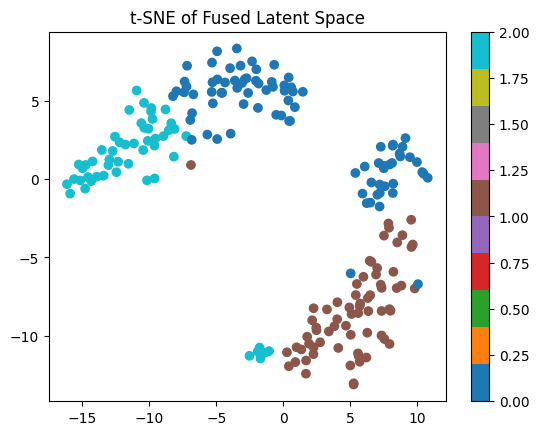

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
z_2d = tsne.fit_transform(z_fused.cpu().numpy())

plt.scatter(z_2d[:,0], z_2d[:,1], c=cluster_labels, cmap="tab10")
plt.colorbar()
plt.title("t-SNE of Fused Latent Space")
plt.show()


# Supervised Machine Learning Evaluation

Now let's train multiple classifiers on the fused features and evaluate with detailed metrics.

In [11]:
# Load subtype labels
labels_df = pd.read_csv("../Updated_model_nd_dataset/processed_labels_3Omics_FXS_OG.csv", index_col=0)

# Align labels with our data
common_samples = gene_df.index.intersection(labels_df.index)
print(f"Samples with labels: {len(common_samples)}")

# Filter data and labels to common samples
labels = labels_df.loc[common_samples].values.ravel()
z_fused_labeled = z_fused.cpu().numpy()

# If data was already aligned, we might need to reindex
if len(common_samples) < len(gene_df):
    # Refilter if needed
    gene_idx = gene_df.index.get_indexer(common_samples)
    z_fused_labeled = z_fused.cpu().numpy()[gene_idx]

print(f"Final data shape: {z_fused_labeled.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Unique classes: {np.unique(labels)}")
print(f"Class distribution: {np.bincount(labels.astype(int))}")

Samples with labels: 205
Final data shape: (205, 192)
Labels shape: (205,)
Unique classes: [0 1 2 3]
Class distribution: [53 22 96 34]


In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix)
import seaborn as sns

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    z_fused_labeled, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training class distribution: {np.bincount(y_train.astype(int))}")
print(f"Test class distribution: {np.bincount(y_test.astype(int))}")

Training set size: 164
Test set size: 41
Training class distribution: [42 18 77 27]
Test class distribution: [11  4 19  7]


In [13]:
# Define multiple classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42, probability=True),
    'SVM (Linear)': SVC(kernel='linear', random_state=42, probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42)
}

# Store results
results = []

print("Training and evaluating classifiers...\n")
print("="*80)

for name, clf in classifiers.items():
    # print(f"\n{name}:")
    # print("-"*80)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
    precision_micro = precision_score(y_test, y_pred, average='micro', zero_division=0)
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
    recall_micro = recall_score(y_test, y_pred, average='micro', zero_division=0)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_micro = f1_score(y_test, y_pred, average='micro', zero_division=0)
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Macro)': precision_macro,
        'Precision (Micro)': precision_micro,
        'Recall (Macro)': recall_macro,
        'Recall (Micro)': recall_micro,
        'F1 (Macro)': f1_macro,
        'F1 (Micro)': f1_micro
    })
    
    # Print metrics
    # print(f"Accuracy:           {accuracy:.4f}")
    # print(f"Precision (Macro):  {precision_macro:.4f}")
    # print(f"Precision (Micro):  {precision_micro:.4f}")
    # print(f"Recall (Macro):     {recall_macro:.4f}")
    # print(f"Recall (Micro):     {recall_micro:.4f}")
    # print(f"F1-Score (Macro):   {f1_macro:.4f}")
    # print(f"F1-Score (Micro):   {f1_micro:.4f}")

print("\n" + "="*80)

Training and evaluating classifiers...



f:\BRACU\Thesis Thingy[T2510589]\DATASET 2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



SUMMARY OF ALL MODELS
              Model  Accuracy  Precision (Macro)  Precision (Micro)  Recall (Macro)  Recall (Micro)  F1 (Macro)  F1 (Micro)
Logistic Regression  0.780488           0.583766           0.780488        0.597403        0.780488    0.588850    0.780488
      Decision Tree  0.731707           0.560536           0.731707        0.564935        0.731707    0.549242    0.731707
      Random Forest  0.707317           0.529915           0.707317        0.503247        0.707317    0.502020    0.707317
  Gradient Boosting  0.707317           0.593750           0.707317        0.543019        0.707317    0.554798    0.707317
       SVM (Linear)  0.682927           0.487879           0.682927        0.490089        0.682927    0.486911    0.682927
K-Nearest Neighbors  0.658537           0.505000           0.658537        0.454375        0.658537    0.450577    0.658537
        Naive Bayes  0.536585           0.689685           0.536585        0.409219        0.536585    0.4310

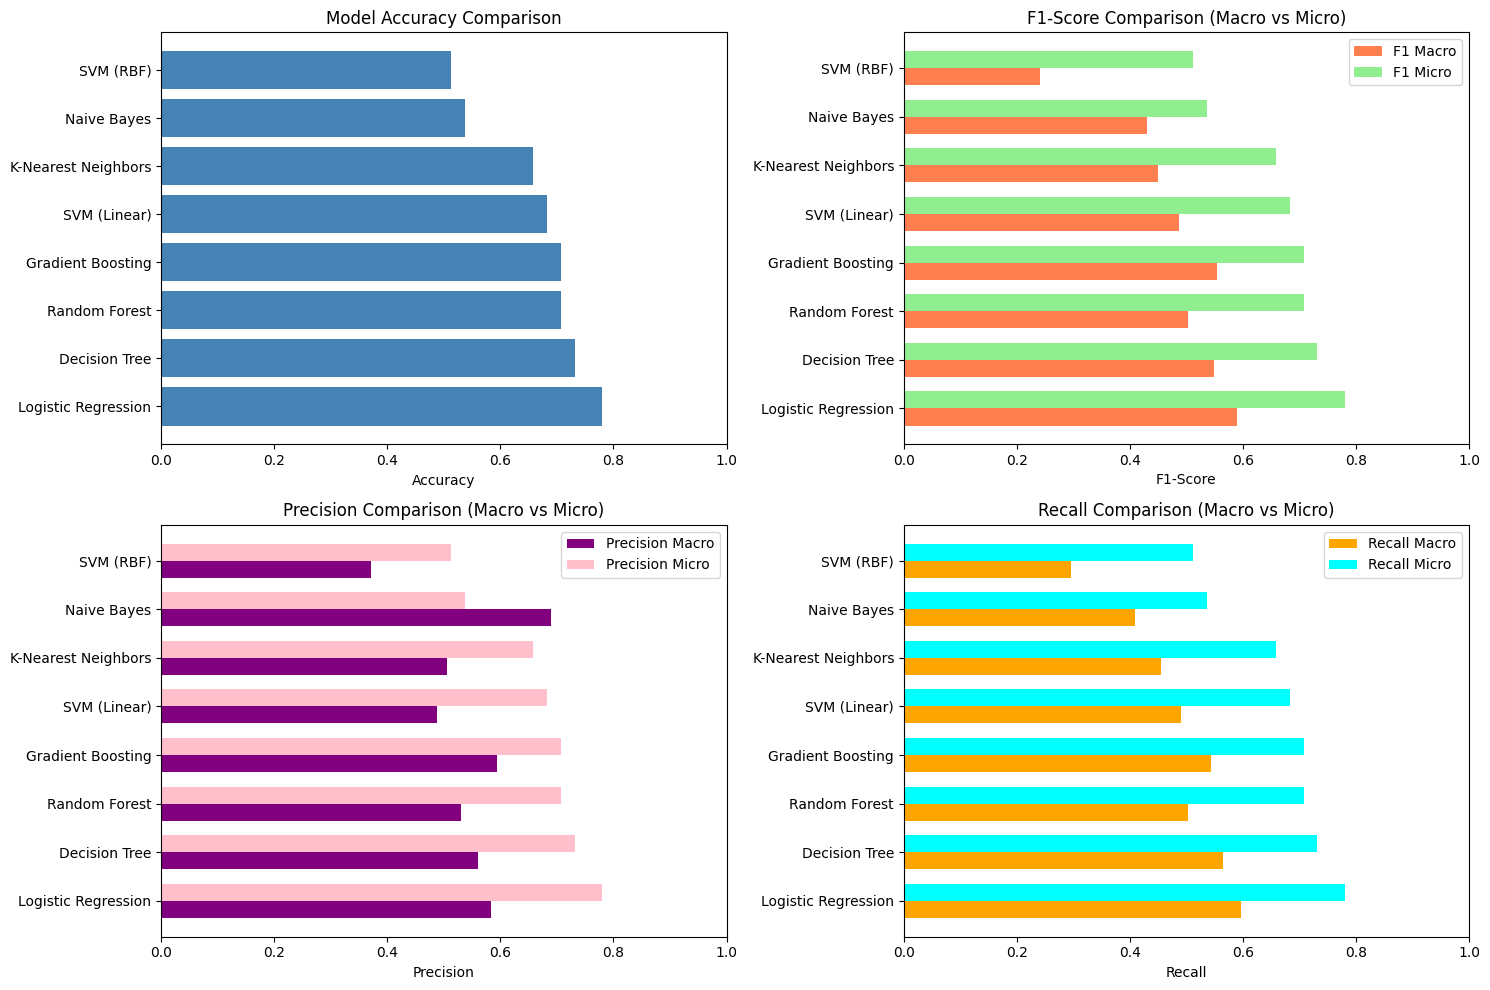

In [14]:
# Create a summary dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("SUMMARY OF ALL MODELS")
print("="*80)
print(results_df.to_string(index=False))

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Accuracy comparison
axes[0, 0].barh(results_df['Model'], results_df['Accuracy'], color='steelblue')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_xlim([0, 1])

# Plot 2: F1-Score comparison (Macro and Micro)
x = np.arange(len(results_df))
width = 0.35
axes[0, 1].barh(x - width/2, results_df['F1 (Macro)'], width, label='F1 Macro', color='coral')
axes[0, 1].barh(x + width/2, results_df['F1 (Micro)'], width, label='F1 Micro', color='lightgreen')
axes[0, 1].set_yticks(x)
axes[0, 1].set_yticklabels(results_df['Model'])
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('F1-Score Comparison (Macro vs Micro)')
axes[0, 1].legend()
axes[0, 1].set_xlim([0, 1])

# Plot 3: Precision comparison
axes[1, 0].barh(x - width/2, results_df['Precision (Macro)'], width, label='Precision Macro', color='purple')
axes[1, 0].barh(x + width/2, results_df['Precision (Micro)'], width, label='Precision Micro', color='pink')
axes[1, 0].set_yticks(x)
axes[1, 0].set_yticklabels(results_df['Model'])
axes[1, 0].set_xlabel('Precision')
axes[1, 0].set_title('Precision Comparison (Macro vs Micro)')
axes[1, 0].legend()
axes[1, 0].set_xlim([0, 1])

# Plot 4: Recall comparison
axes[1, 1].barh(x - width/2, results_df['Recall (Macro)'], width, label='Recall Macro', color='orange')
axes[1, 1].barh(x + width/2, results_df['Recall (Micro)'], width, label='Recall Micro', color='cyan')
axes[1, 1].set_yticks(x)
axes[1, 1].set_yticklabels(results_df['Model'])
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_title('Recall Comparison (Macro vs Micro)')
axes[1, 1].legend()
axes[1, 1].set_xlim([0, 1])

plt.tight_layout()
plt.show()


DETAILED REPORT FOR BEST MODEL: Logistic Regression

Classification Report (per-class metrics):
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9000    0.8182    0.8571        11
           1     0.0000    0.0000    0.0000         4
           2     0.8636    1.0000    0.9268        19
           3     0.5714    0.5714    0.5714         7

    accuracy                         0.7805        41
   macro avg     0.5838    0.5974    0.5889        41
weighted avg     0.7392    0.7805    0.7570        41



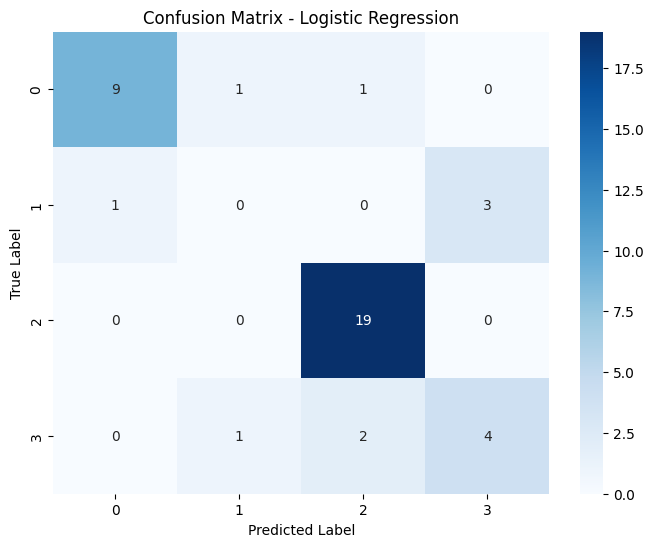


Confusion Matrix:
[[ 9  1  1  0]
 [ 1  0  0  3]
 [ 0  0 19  0]
 [ 0  1  2  4]]


In [15]:
# Detailed classification report for the best model
best_model_name = results_df.iloc[0]['Model']
best_clf = classifiers[best_model_name]

print(f"\n{'='*80}")
print(f"DETAILED REPORT FOR BEST MODEL: {best_model_name}")
print(f"{'='*80}\n")

# Retrain on the data (already trained, but for clarity)
y_pred_best = best_clf.predict(X_test)

# Classification report
print("Classification Report (per-class metrics):")
print("-"*80)
print(classification_report(y_test, y_pred_best, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

print(f"\nConfusion Matrix:")
print(cm)

In [16]:
# Cross-validation for the top 3 models
print(f"\n{'='*80}")
print("CROSS-VALIDATION RESULTS (5-Fold Stratified)")
print(f"{'='*80}\n")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (name, clf) in enumerate(list(classifiers.items())[:3]):  # Top 3 models
    scores = cross_val_score(clf, z_fused_labeled, labels, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(clf, z_fused_labeled, labels, cv=cv, scoring='f1_macro')
    
    print(f"{name}:")
    print(f"  Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"  F1-Macro: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")
    print()


CROSS-VALIDATION RESULTS (5-Fold Stratified)

Random Forest:
  Accuracy: 0.6732 (+/- 0.0796)
  F1-Macro: 0.5534 (+/- 0.0928)

Gradient Boosting:
  Accuracy: 0.6000 (+/- 0.0589)
  F1-Macro: 0.4848 (+/- 0.0752)

SVM (RBF):
  Accuracy: 0.5171 (+/- 0.0473)
  F1-Macro: 0.2527 (+/- 0.0629)

